In [1]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('data/processed.tsv', sep='\t')

In [3]:
df = df[df['yoe_total'] <= 10]
df = df[df['degree'] != 'phd']

In [4]:
# df['degree'] = df['degree'].replace({
#     'bachelor': 'Bachelor',
#     'master': 'Master',
# })

In [5]:
df.loc[df['degree'] == 'master', 'yoe_total'] = df.loc[df['degree'] == 'master', 'yoe_total'] +2

In [15]:
df['degree'] = df['degree'].replace({
    'bachelor': 'Bachelor',
    'master': 'Master',
})

In [7]:
df = df[df['yoe_total'] <= 10]
df = df[df['degree'] != 'phd']

# Matplotlib

In [16]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,5)

In [17]:
def plot_base():
    grped = df.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'median', 'std']})
    grped.columns = grped.columns.map('_'.join)
    grped['lower'] = grped['tc_mean'] - grped['tc_std']
    grped['upper'] = grped['tc_mean'] + grped['tc_std']
    plt.ylim([110000, 390000])

    sns.lineplot(data=grped, x='yoe_total', y='tc_mean', hue='degree')
    
def labels(ax):
    l1 = plt.legend(["Bachelor's", "Master's"], loc=2, title='Degree')
    ax.add_artist(l1)
    ax.set_ylabel("Total Compensation ($)")
    ax.set_xlabel("Years of Experience")
    ax.set_title("Does Grad School Pay Off?")
    ax.get_yaxis().set_major_formatter(
        FuncFormatter(lambda x, p: format(int(x), ',')))

def plot_dotted(temp_df):
    grped = temp_df.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'median', 'std']})
    grped.columns = grped.columns.map('_'.join)

    sns.lineplot(data=grped, x='yoe_total', y='tc_mean', hue='degree', linestyle = '--')
    
def get_tc_diff(df):
    mean_tc = df.groupby('degree')['tc'].mean()
    print(f"Mean TC Difference: {mean_tc['master'] - mean_tc['bachelor']}")
    mean_tc_no_yoe = df[df['yoe_total'] == 0].groupby('degree')['tc'].mean()
    print(f"Entry TC Difference: {mean_tc_no_yoe['master'] - mean_tc_no_yoe['bachelor']}")
    return 

In [18]:
#get_tc_diff(df)

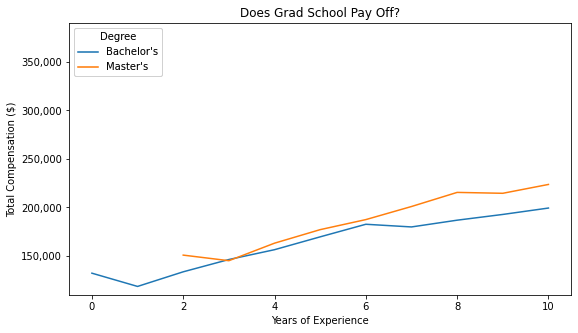

In [11]:
ax = plt.gca()

plot_base()

labels(ax)
# ax.annotate('SDL', xy=(0.5, 0.20), xytext=(0.5, .3), xycoords='axes fraction', 
#             ha='center', va='bottom',
#             bbox=dict(boxstyle='square', fc='white'),
#             arrowprops=dict(arrowstyle='-[, widthB=7.0, lengthB=1.5', lw=2.0,))
plt.savefig('./vis/1-blank.png', dpi=200)

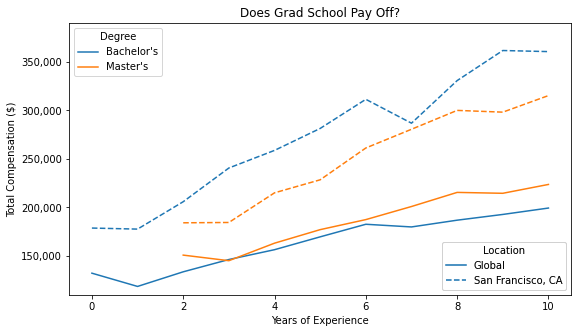

In [12]:
ax = plt.gca()

plot_base()

temp_df = df[df['location'] == 'San Francisco, CA']
plot_dotted(temp_df)
#get_tc_diff(temp_df)

labels(ax)

lines = ax.get_lines()
l2 = plt.legend([lines[i] for i in [0, 4]],['Global','San Francisco, CA'], loc=4, title='Location')
ax.add_artist(l2)

plt.savefig('./vis/2-sf.png', dpi=200)

Mean TC Difference: 2746.2621043327963


KeyError: 'master'

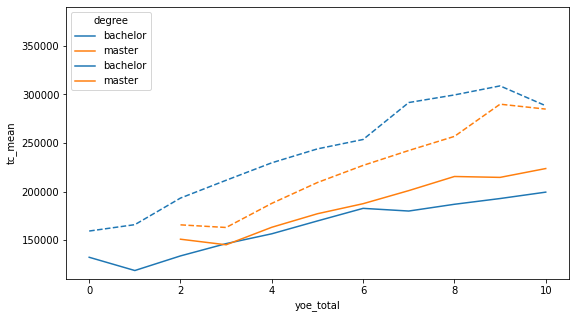

In [13]:
ax = plt.gca()

plot_base()

temp_df = df[df['location'] == 'Seattle, WA']
plot_dotted(temp_df)
get_tc_diff(temp_df)

labels(ax)

lines = ax.get_lines()
l2 = plt.legend([lines[i] for i in [0, 4]],['Global','Seattle, WA'], loc=4, title='Location')
ax.add_artist(l2)
plt.savefig('./vis/3-seattle.png', dpi=200)

Mean TC Difference: 22076.627926433808
Entry TC Difference: 8773.907496012776


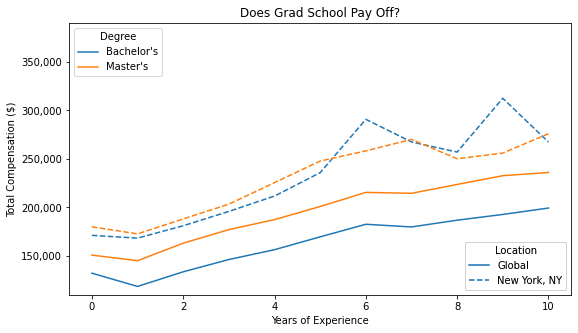

In [ ]:
ax = plt.gca()

plot_base()

temp_df = df[df['location'] == 'New York, NY']
plot_dotted(temp_df)
get_tc_diff(temp_df)

labels(ax)

lines = ax.get_lines()
l2 = plt.legend([lines[i] for i in [0, 4]],['Global','New York, NY'], loc=4, title='Location')
ax.add_artist(l2)
plt.savefig('./vis/4-ny.png', dpi=200)

Mean TC Difference: 14151.695499857975
Entry TC Difference: 1060.6889010388113


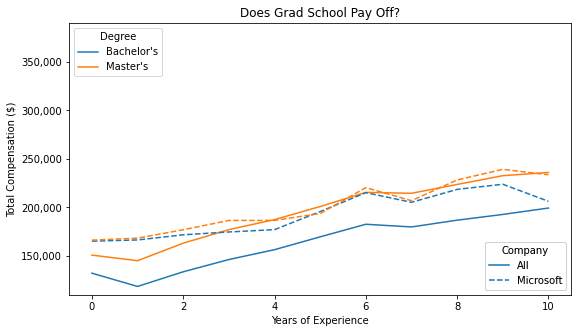

In [ ]:
ax = plt.gca()

plot_base()

temp_df = df[(df['company'] == 'Microsoft') & (df['country'] == 'United States')]
plot_dotted(temp_df)
get_tc_diff(temp_df)

labels(ax)

lines = ax.get_lines()
l2 = plt.legend([lines[i] for i in [0, 4]],['All','Microsoft'], loc=4, title='Company')
ax.add_artist(l2)
plt.savefig('./vis/5-microsoft.png', dpi=200)

KeyError: 'master'

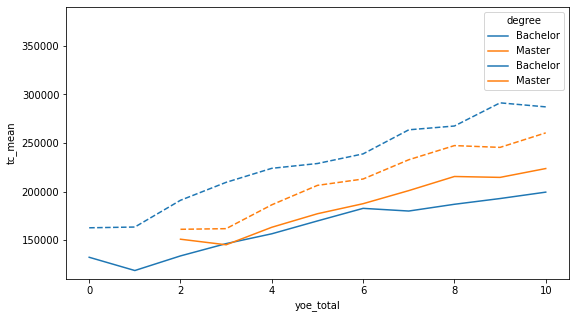

In [21]:
ax = plt.gca()

plot_base()

temp_df = df[(df['company'] == 'Amazon') & (df['country'] == 'United States')]
plot_dotted(temp_df)
get_tc_diff(temp_df)

labels(ax)

lines = ax.get_lines()
l2 = plt.legend([lines[i] for i in [0, 4]],['All','Amazon'], loc=4, title='Company')
ax.add_artist(l2)
plt.savefig('./vis/6-amzn.png', dpi=200)

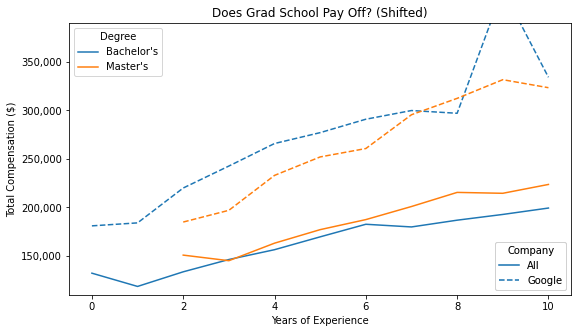

In [22]:
ax = plt.gca()

plot_base()

temp_df = df[(df['company'] == 'Google') & (df['country'] == 'United States')]
plot_dotted(temp_df)
#get_tc_diff(temp_df)


labels(ax)

lines = ax.get_lines()
l2 = plt.legend([lines[i] for i in [0, 4]],['All','Google'], loc=4, title='Company')
ax.add_artist(l2)

plt.title("Does Grad School Pay Off? (Shifted)")
plt.savefig('./vis/7-google.png', dpi=200)

# Plotly

In [15]:
grped = df.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'median', 'std']})
grped.columns = grped.columns.map('_'.join)
grped['lower'] = grped['tc_mean'] - grped['tc_std']
grped['upper'] = grped['tc_mean'] + grped['tc_std']

#fig = make_subplots(rows=1, cols=2)
fig = px.line(grped,
    x=grped.index.get_level_values('yoe_total'),
    y='tc_mean',
    color=grped.index.get_level_values('degree'),
    labels={
        "x": "Years of Experience",
        "tc_mean": "Total Compensation ($)",
        "color": "Degree Level"
    },
    title="Compensation Over Time",
    )
fig.update_layout(title_x=0.5)
fig.update_yaxes(range=[110000, 390000])
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
)
temp_df = df[df['location'] == 'San Francisco, CA']
grped = temp_df.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'median', 'std']})
grped.columns = grped.columns.map('_'.join)
grped['lower'] = grped['tc_mean'] - grped['tc_std']
grped['upper'] = grped['tc_mean'] + grped['tc_std']

fig = px.line(grped,
    x=grped.index.get_level_values('yoe_total'),
    y='tc_mean',
    color=grped.index.get_level_values('degree'),
    labels={
        "x": "Years of Experience",
        "tc_mean": "Total Compensation ($)",
        "color": "Degree Level"
    },
    title="Compensation Over Time (San Francisco only)",
)
fig.update_layout(title_x=0.5)
fig.update_yaxes(range=[110000, 390000])
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20))

TypeError: line() got an unexpected keyword argument 'fig'

In [8]:
temp_df = df[df['location'] == 'San Francisco, CA']
grped = temp_df.groupby(['degree', 'yoe_total']).agg({'tc': ['mean', 'median', 'std']})
grped.columns = grped.columns.map('_'.join)
grped['lower'] = grped['tc_mean'] - grped['tc_std']
grped['upper'] = grped['tc_mean'] + grped['tc_std']

fig = px.line(grped,
    x=grped.index.get_level_values('yoe_total'),
    y='tc_mean',
    color=grped.index.get_level_values('degree'),
    labels={
        "x": "Years of Experience",
        "tc_mean": "Total Compensation ($)",
        "color": "Degree Level"
    },
    title="Compensation Over Time (San Francisco only)"
)
fig.update_layout(title_x=0.5)
fig.update_yaxes(range=[110000, 390000])
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
)
fig.write_image('./vis/fig2.png')